# Required
The required libraries/packages for this assignment is `pandas` , `numpy`, `matplotlib` and `seaborn`.
- `pip install pandas`
- `pip install numpy`
- `pip instal matplotlib`
- `pip install seaborn`


## Read in the "COVID-19_Vaccinations_by_Age_(Maricopa_County)" dataset
Read the required data from the CSV file and inspect it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Loading the dataset
df = pd.read_csv("/content/COVID-19_Vaccinations_by_Age_(Maricopa_County).csv")

In [2]:
#Inspect the first 5 rows of the dataset
df.head()

,OBJECTID,PostalCode,TotalVaccinated,VaccinatedAge75Up,VaccinatedAge65To74,VaccinatedAge55To64,VaccinatedAge45To54,VaccinatedAge35To44,VaccinatedAge25To34,VaccinatedAge15To24,VaccinatedAge0To14,StartDate,CreateDate
0,1,85190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021/06/16 07:00:00+00,NaN
1,2,85333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021/06/16 07:00:00+00,NaN
2,3,85139,3.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,2021/06/16 07:00:00+00,NaN
3,4,85343,102.0,17.0,17.0,16.0,17.0,16.0,12.0,NaN,0.0,2021/06/16 07:00:00+00,NaN
4,5,85377,2662.0,817.0,936.0,528.0,146.0,72.0,82.0,72.0,NaN,2021/06/16 07:00:00+00,NaN


In [3]:
#Inspect the last 5 rows of the dataset
df.tail()

,OBJECTID,PostalCode,TotalVaccinated,VaccinatedAge75Up,VaccinatedAge65To74,VaccinatedAge55To64,VaccinatedAge45To54,VaccinatedAge35To44,VaccinatedAge25To34,VaccinatedAge15To24,VaccinatedAge0To14,StartDate,CreateDate
4517,4785,85301,31492.0,1776.0,2873.0,4580.0,4946.0,4814.0,4893.0,5366.0,2244.0,2022/02/16 16:23:35+00,2022/02/16 16:23:35+00
4518,4786,85282,32874.0,3165.0,3238.0,3948.0,3611.0,4761.0,7854.0,4916.0,1381.0,2022/02/16 16:23:35+00,2022/02/16 16:23:35+00
4519,4787,85225,43585.0,2550.0,4553.0,6741.0,6883.0,7139.0,7337.0,5830.0,2552.0,2022/02/16 16:23:35+00,2022/02/16 16:23:35+00
4520,4788,85281,38174.0,1138.0,1971.0,2899.0,2999.0,4394.0,12183.0,11725.0,865.0,2022/02/16 16:23:35+00,2022/02/16 16:23:35+00
4521,4789,85248,30270.0,8181.0,6214.0,4162.0,3507.0,2682.0,1780.0,2325.0,1419.0,2022/02/16 16:23:35+00,2022/02/16 16:23:35+00


## Filtering the dataset and Data cleaning for the filtered dataset
- Subset the data by columns to choose only those columns which will help in answering the dataset associated questions.

In [4]:
filtered_df=df.filter(items=['TotalVaccinated','VaccinatedAge75Up','VaccinatedAge65To74','VaccinatedAge55To64','VaccinatedAge45To54','VaccinatedAge35To44','VaccinatedAge25To34','VaccinatedAge15To24','VaccinatedAge0To14','StartDate'])
filtered_df.head()

,TotalVaccinated,VaccinatedAge75Up,VaccinatedAge65To74,VaccinatedAge55To64,VaccinatedAge45To54,VaccinatedAge35To44,VaccinatedAge25To34,VaccinatedAge15To24,VaccinatedAge0To14,StartDate
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021/06/16 07:00:00+00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021/06/16 07:00:00+00
2,3.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,2021/06/16 07:00:00+00
3,102.0,17.0,17.0,16.0,17.0,16.0,12.0,NaN,0.0,2021/06/16 07:00:00+00
4,2662.0,817.0,936.0,528.0,146.0,72.0,82.0,72.0,NaN,2021/06/16 07:00:00+00


## Data Preprocessing: Cleaning and Manipulation
- Renaming the column names of the filtered dataframe to improve readibility and understandibility.
- Understand the total number of rows and columns of the dataset along with the datatypes of each column. Additionally, figure out how many missing values are present so that I can handle them in the filtered dataset.
- Perform data cleaning by changing the datatype of "StartDate" from "Object" to "DateTime".
- Adding a new column "VaccinatedYear" by extracting the "year" value and another column "VaccinatedMonth" by extracting "month" from "StartDate".
- Drop the "StartDate" column as it does not contribute for further analysis.


In [5]:
filtered_df.rename(columns={'VaccinatedAge75Up':'Above75', 'VaccinatedAge65To74':'65-74','VaccinatedAge55To64':'55-64', 'VaccinatedAge45To54':'45-54', 'VaccinatedAge35To44':'35-44', 'VaccinatedAge25To34':'25-34','VaccinatedAge15To24':'15-24', 'VaccinatedAge0To14':'0-14'}, inplace=True)
filtered_df.head()

,TotalVaccinated,Above75,65-74,55-64,45-54,35-44,25-34,15-24,0-14,StartDate
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021/06/16 07:00:00+00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021/06/16 07:00:00+00
2,3.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,2021/06/16 07:00:00+00
3,102.0,17.0,17.0,16.0,17.0,16.0,12.0,NaN,0.0,2021/06/16 07:00:00+00
4,2662.0,817.0,936.0,528.0,146.0,72.0,82.0,72.0,NaN,2021/06/16 07:00:00+00


In [6]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4522 entries, 0 to 4521
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TotalVaccinated  4454 non-null   float64
 1   Above75          4454 non-null   float64
 2   65-74            4420 non-null   float64
 3   55-64            4454 non-null   float64
 4   45-54            4454 non-null   float64
 5   35-44            4427 non-null   float64
 6   25-34            4420 non-null   float64
 7   15-24            4452 non-null   float64
 8   0-14             4327 non-null   float64
 9   StartDate        4389 non-null   object 
dtypes: float64(9), object(1)
memory usage: 353.4+ KB


In [7]:
missing_values_per_column=filtered_df.isnull().sum()
missing_values_per_column

TotalVaccinated     68
Above75             68
65-74              102
55-64               68
45-54               68
35-44               95
25-34              102
15-24               70
0-14               195
StartDate          133
dtype: int64

In [8]:
total_missing_values=missing_values_per_column.sum(axis=0)
missing_values_per_column.loc['Total Missing Values']=total_missing_values
missing_values_per_column

TotalVaccinated          68
Above75                  68
65-74                   102
55-64                    68
45-54                    68
35-44                    95
25-34                   102
15-24                    70
0-14                    195
StartDate               133
Total Missing Values    969
dtype: int64

## Handling missing values
- Writing a user-defined function named "fill_missing_values" which checks each row for missing values in the specified columns. If there is exactly one missing value, it calculates the missing value by subtracting the sum of the known values from TotalVaccinated.
- The apply method is used to apply the fill_missing_values function to each row of the DataFrame.
- This will help in fill some of the missing values and after that, will check how many of them still are present.


In [9]:
# Columns to check for missing values
columns_to_check = ["Above75","65-74","55-64","45-54","35-44","25-34","15-24","0-14"]

# Function to fill missing values
def fill_missing_values(row):
    missing_count = row[columns_to_check].isna().sum()
    if missing_count == 1:
        known_sum = row[columns_to_check].sum(skipna=True)
        missing_value = row["TotalVaccinated"] - known_sum
        row[columns_to_check] = row[columns_to_check].fillna(missing_value)
    return row

# Apply the function to the DataFrame
filtered_df = filtered_df.apply(fill_missing_values, axis=1)

In [10]:
missing_values_per_column=filtered_df.isnull().sum()
missing_values_per_column

TotalVaccinated     68
Above75             68
65-74              102
55-64               68
45-54               68
35-44               95
25-34              102
15-24               68
0-14                68
StartDate          133
dtype: int64

In [11]:
total_missing_values=missing_values_per_column.sum(axis=0)
missing_values_per_column.loc['Total Missing Values']=total_missing_values
missing_values_per_column

TotalVaccinated          68
Above75                  68
65-74                   102
55-64                    68
45-54                    68
35-44                    95
25-34                   102
15-24                    68
0-14                     68
StartDate               133
Total Missing Values    840
dtype: int64

In [12]:
#Computing the percentage of missing values present in the filtered dataset
total_cells = np.product(filtered_df.shape)
percent_missing = (total_missing_values/total_cells) * 100
print(percent_missing)
print(f"Rounding up to 2 decimals for percentage of missing values: {round(percent_missing, 2)}")

1.8575851393188854
Rounding up to 2 decimals for percentage of missing values: 1.86


In [13]:
# Since there are only 1.86% of null or missing values, so better to drop those missing values.
filtered_df = filtered_df.dropna()
filtered_df.isnull().sum()

TotalVaccinated    0
Above75            0
65-74              0
55-64              0
45-54              0
35-44              0
25-34              0
15-24              0
0-14               0
StartDate          0
dtype: int64

In [14]:
filtered_df['StartDate']=pd.to_datetime(filtered_df['StartDate'])

In [15]:
filtered_df['VaccinatedMonth']= filtered_df['StartDate'].dt.month_name()
filtered_df['VaccinatedYear']= filtered_df['StartDate'].dt.year
filtered_df.head()

,TotalVaccinated,Above75,65-74,55-64,45-54,35-44,25-34,15-24,0-14,StartDate,VaccinatedMonth,VaccinatedYear
3,102.0,17.0,17.0,16.0,17.0,16.0,12.0,7.0,0.0,2021-06-16 07:00:00+00:00,June,2021
4,2662.0,817.0,936.0,528.0,146.0,72.0,82.0,72.0,9.0,2021-06-16 07:00:00+00:00,June,2021
5,3164.0,978.0,1300.0,709.0,77.0,27.0,36.0,31.0,6.0,2021-06-16 07:00:00+00:00,June,2021
6,229.0,34.0,43.0,54.0,25.0,25.0,30.0,15.0,3.0,2021-06-16 07:00:00+00:00,June,2021
7,509.0,56.0,60.0,80.0,53.0,67.0,143.0,50.0,0.0,2021-06-16 07:00:00+00:00,June,2021


In [16]:
filtered_df.tail()

,TotalVaccinated,Above75,65-74,55-64,45-54,35-44,25-34,15-24,0-14,StartDate,VaccinatedMonth,VaccinatedYear
4517,31492.0,1776.0,2873.0,4580.0,4946.0,4814.0,4893.0,5366.0,2244.0,2022-02-16 16:23:35+00:00,February,2022
4518,32874.0,3165.0,3238.0,3948.0,3611.0,4761.0,7854.0,4916.0,1381.0,2022-02-16 16:23:35+00:00,February,2022
4519,43585.0,2550.0,4553.0,6741.0,6883.0,7139.0,7337.0,5830.0,2552.0,2022-02-16 16:23:35+00:00,February,2022
4520,38174.0,1138.0,1971.0,2899.0,2999.0,4394.0,12183.0,11725.0,865.0,2022-02-16 16:23:35+00:00,February,2022
4521,30270.0,8181.0,6214.0,4162.0,3507.0,2682.0,1780.0,2325.0,1419.0,2022-02-16 16:23:35+00:00,February,2022


## Data Manipulation: Grouping and Aggregating
Let's answer the the questions:

## Question 1:
How do the vaccination totals between age groups compare?

In [17]:
# Calculate the total vaccinations for each age group
age_groups_vaccination_totals = filtered_df[['0-14', '15-24', '25-34', '35-44', '45-54', '55-64', '65-74', 'Above75']].sum().reset_index()
age_groups_vaccination_totals.columns = ['Age Group', 'Total']
#Sort the values by "Total" in descending order
age_groups_vaccination_totals=age_groups_vaccination_totals.sort_values(by='Total', ascending=False).reset_index()
age_groups_vaccination_totals.drop(columns=['index'], inplace=True)
age_groups_vaccination_totals

,Age Group,Total
0,55-64,12206942.0
1,45-54,11372614.0
2,65-74,11179279.0
3,35-44,10875979.0
4,25-34,10479721.0
5,15-24,9246094.0
6,Above75,8557125.0
7,0-14,2450000.0


Pretty Plot for question 1

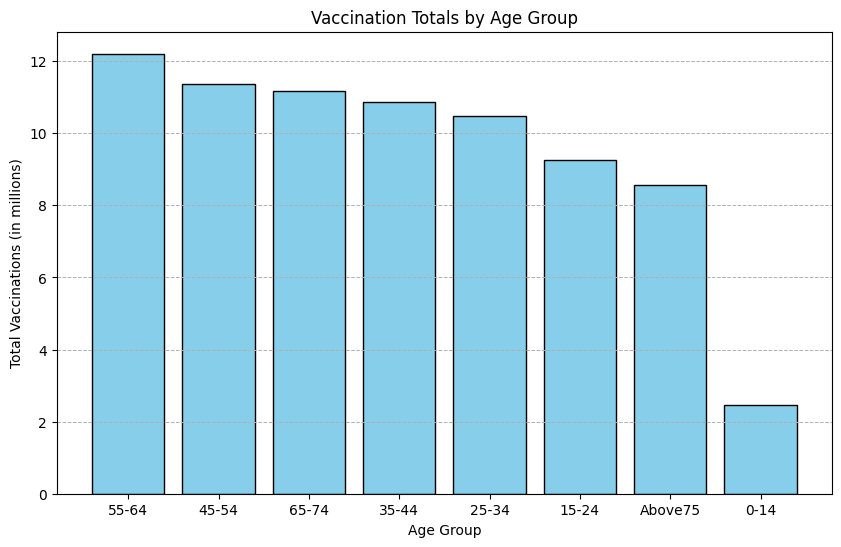

In [18]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define a formatter function
def millions(x, pos):
    'The two args are the value and tick position'
    return '%d' % (x * 1e-6)

# Create a bar plot (Pretty plot)
plt.figure(figsize=(10, 6))
plt.bar(age_groups_vaccination_totals['Age Group'], age_groups_vaccination_totals['Total'], color='skyblue', edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Total Vaccinations (in millions)')
plt.title('Vaccination Totals by Age Group')

# Format the y-axis to show millions
formatter = FuncFormatter(millions)
plt.gca().yaxis.set_major_formatter(formatter)

# Enable grid for the plot
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)

plt.show()


Figure 1. Total COVID Vaccinations Administered by Age Group in Maricopa county: This bar chart illustrates the distribution of vaccinations across various age groups, highlighting that the 55-64 years age group received the highest number of vaccinations, followed by the 45-54 years age group. Notably, the 0-14 age group had the lowest vaccination totals. Y axis shows Total vaccinations (in millions).

## Key observations:
- The highest number of total vaccinations were taken by people falling in age group bracket of 55 years to 64 years.
- The least number of total vaccinations were taken by the people falling in age group bracket of less than 15 years.

Ugly Plot for question 1

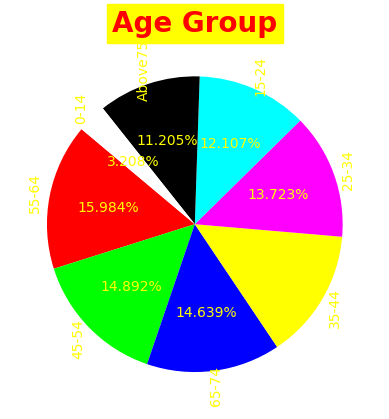

In [19]:
#Ugly Plot
# Define clashing and unpleasant colors
ugly_colors = ['#ff0000', '#00ff00', '#0000ff', '#ffff00', '#ff00ff', '#00ffff', '#000000', '#ffffff']

# Create the pie chart with awkward aesthetics
patches, texts, autotexts = plt.pie(
    age_groups_vaccination_totals['Total'],
    labels=age_groups_vaccination_totals['Age Group'],
    autopct='%1.3f%%',
    startangle=140,
    textprops=dict(rotation_mode='anchor', ha='center', fontsize=10, color='yellow'),
    colors=ugly_colors
)
for text in texts:
    text.set_rotation(90)
# Add a title with unpleasant aesthetics
plt.title('Age Group', fontsize=20, color='red', fontweight='heavy', backgroundcolor='yellow')
plt.show()

The chart shows the number of vaccinations given to various age groups, with the 55-64 years old age group get many vaccinations and the age group 0-14 years having the less vaccinations.
The chart represents the total number of vaccinations in millions of vaccinations.


The key errors in Ugly plot of question 1:

- A pie plot isn't a great choice here.
- Yellow is virtually invisible for labels and the percentage text yellow overlaps with the yellow portion of the pie chart.
- The title is incomplete, just mentions age group and does not state the vaccination totals.
- The percentages are not well formatted upto 2 decimals making it longer.
- The age groups intersect with the pie chart border hence the overall pie chart looks very messy.
- No proper spacing between the title and the pie chart labels.
- The figure size isn't set properly due to which all the text depictions are messy overlapping with one another.
- Overall the pie plot looks messy, not readable and very unpleasant to refer and understand the data.


## Question 2:
How have the average vaccination totals changed over time in Maricopa County?

In [20]:
avg_vaccination_totals_over_time= filtered_df.groupby(['VaccinatedYear', 'VaccinatedMonth'])['TotalVaccinated'].mean().reset_index(name='Average_Total_Vaccinated')
# Rounding the average totals to 2 decimal points
avg_vaccination_totals_over_time['Average_Total_Vaccinated'] = avg_vaccination_totals_over_time['Average_Total_Vaccinated'].round(2)
# Displaying the result
avg_vaccination_totals_over_time


,VaccinatedYear,VaccinatedMonth,Average_Total_Vaccinated
0,2021,August,16147.90
1,2021,December,18784.79
2,2021,July,15912.95
3,2021,June,15364.52
4,2021,November,18589.44
5,2021,October,18311.31
6,2021,September,18032.56
7,2022,February,20272.66
8,2022,January,19819.36


In [21]:
#Pivot table for average vaccination totals over time
avg_vaccination_totals_over_time_pivot=avg_vaccination_totals_over_time.pivot(index='VaccinatedMonth', columns='VaccinatedYear',values='Average_Total_Vaccinated')
avg_vaccination_totals_over_time_pivot = avg_vaccination_totals_over_time_pivot.fillna(0)
avg_vaccination_totals_over_time_pivot

VaccinatedYear,2021,2022
VaccinatedMonth,,
August,16147.90,0.00
December,18784.79,0.00
February,0.00,20272.66
January,0.00,19819.36
July,15912.95,0.00
June,15364.52,0.00
November,18589.44,0.00
October,18311.31,0.00
September,18032.56,0.00


Pretty Plot for question 2

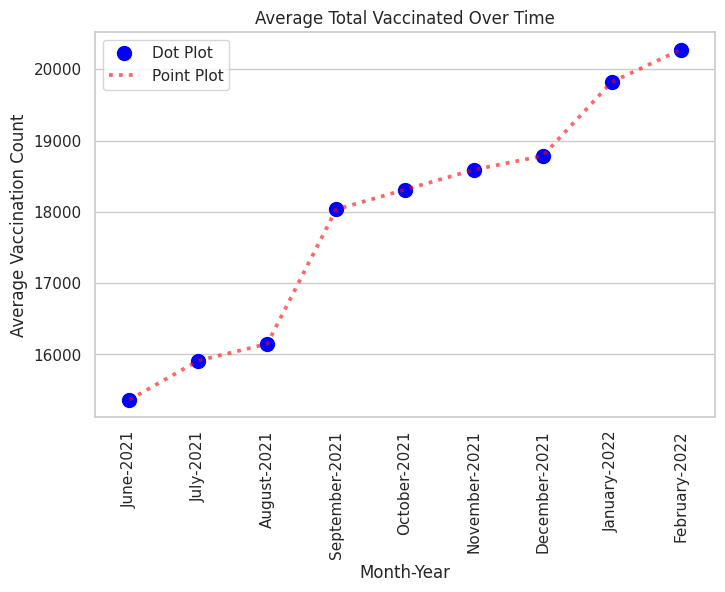

In [22]:
# Define the correct order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
avg_vaccination_totals_over_time['VaccinatedMonth'] = pd.Categorical(avg_vaccination_totals_over_time['VaccinatedMonth'], categories=months_order, ordered=True)

# Sort by year and then by month
avg_vaccination_totals_over_time = avg_vaccination_totals_over_time.sort_values(by=['VaccinatedYear', 'VaccinatedMonth'])

# Create a new column for plotting purposes
avg_vaccination_totals_over_time['Month-Year'] = avg_vaccination_totals_over_time['VaccinatedMonth'].astype(str) + '-' + avg_vaccination_totals_over_time['VaccinatedYear'].astype(str)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Dot Plot using Matplotlib
plt.plot(avg_vaccination_totals_over_time['Month-Year'], avg_vaccination_totals_over_time['Average_Total_Vaccinated'], 'o', color='blue', markersize=10, label='Dot Plot')

# Overlay the point plot using Seaborn
sns.pointplot(x='Month-Year', y='Average_Total_Vaccinated', data=avg_vaccination_totals_over_time, marker=None,linestyles=':', color='red', label='Point Plot', alpha=0.6)

plt.title('Average Total Vaccinated Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Average Vaccination Count')
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

Figure 3. Average Monthly COVID-19 Vaccination Counts (June 2021 - February 2022): The graph shows a steady increase in average monthly vaccinations, with a notable rise from August to September 2021 and continued growth through February 2022. Blue dots represent data points, connected by a red dotted line indicating overall trends.

## Key Observations:
- From June 2021 to February 2022, there is positive rise in the average vaccination count taken by the people.
- Overall there is a gradual rise in average vaccination count with exceptional sharp increase from August 2021  to September 2021.

Ugly Plot for question 2

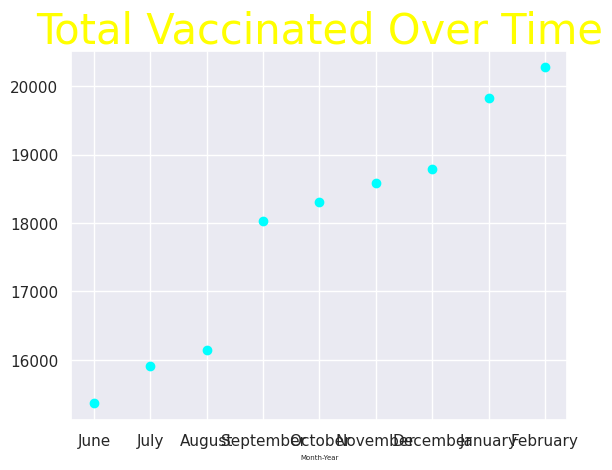

In [23]:
#Ugly plot
# Set the style of seaborn
sns.set(style="darkgrid")

# Dot Plot using Matplotlib
plt.plot(avg_vaccination_totals_over_time['VaccinatedMonth'], avg_vaccination_totals_over_time['Average_Total_Vaccinated'], 'o', color='aqua')

plt.title('Total Vaccinated Over Time', fontsize=30, color='Yellow')
plt.xlabel('Month-Year', fontsize=5)
plt.show()

Average Month - Year Trend of  COVID-19 Vaccine Counts: This graph is showing a steady increase in the average monthly vaccinations.  
The light blue dots are the data points that show the annual trend from the year 2021 to 2022."


The key errors in Ugly plot of question 2:

- The title is inaccurate as it states total vaccinations over years. The right title should be "Average total vaccinated over time".
- Light blue is virtually invisible.
- The dark grid style does not suit well with the colors used for dot plot.
- The x axis texts are overlapping with each other and have no rotation set properly.
- The x-axis label states "Month-Year" whereas only months are displayed and the font-size is so tiny for this label.
- The y-axis label is not present.
